## Abstract
#### Esta notebook pretende ser un comienzo de evaluacion de datos para el Dataset de Espectativa de Vida. La idea es poder evaluar la relacion entre datos a traves de distintas graficas univariadas, bivariadas y multivariadas para luego culminar con pruebas de modelos de regresion y asi poder determinar que variables pueden establecer una relacion valida con el objetivo que es poder predecir la espectativa de vida

## Preguntas: 
#### Que relacion existe entre el Status de un pais y la espectativa de Vida? Se realiza un boxplot agrupando por Status (Developing, Developed) y se plotea la espectativa de vida. La idea es poder determinar si existe un grado de relacion determinante entre estas dos variables
#### Los paises con espectativa de vida mas baja presentan un GDP mas bajo? Intenta visualizar algun tipo de relacion entre el GDP del paiss (Tomado como GDP mas alto, mejor status economico y GDP mas bajo menor status economico) y la espectativa de vida.
#### Analisis individualizado por enfermedad respecto a la espectativa de vida. Luego se procedera a realizar un modelo multivariado con todas ellas para intentar alcanzar un modelo con una confianza alta.
#### Detectar curvas de tendencia a nivel mundial de la espectativa de vida. Se promediaran todos los datos de todos los paises para un anio dado y se plotearan todos los años de los que se tienen datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import random
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Life_Expectancy_Data.csv')

In [3]:
df.head(20)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [9]:
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [4]:
df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

# Se decide en primera instancia, analizar algunas variables basicas que sirvieron para el desafio anterior

### Grafica de expectativa de vida por pais. 
#### Se decide plotear cada uno individual por la cantidad de paises existentes dado que no queda visible en un solo grafico toda la info.

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


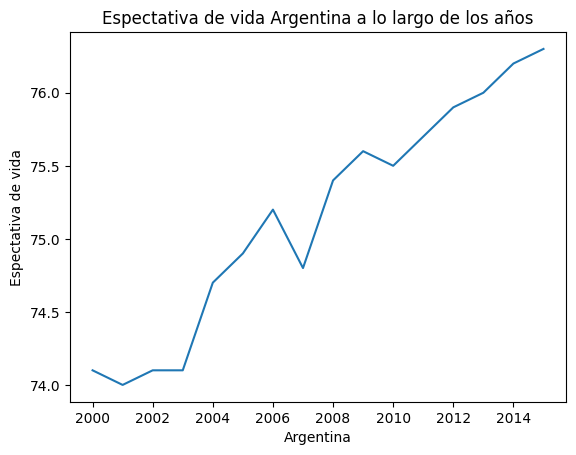

In [37]:
print(df.columns.tolist())

df_espectativa = df[["Country","Year", 'Life expectancy ']].copy()

## Imprime todas las grafiacas de todos los paises, mucho tiempo de procesamiento y baja calidad de visualizacion
#paises = copia_df.groupby("Country")

#for i, (name,group) in enumerate(paises):
#  group.plot(x="Year",y="Life expectancy ", xlabel = name, ylabel='Life Expectancy')

df_espectativa= df_espectativa[(df_espectativa['Country']== 'Argentina')]

plt.plot("Year","Life expectancy ",data = df_espectativa)

plt.xlabel('Argentina')
plt.ylabel('Espectativa de vida')
plt.title('Espectativa de vida Argentina a lo largo de los años')
#plt.legend()
plt.show()


## Mortandad de diferentes enfermedades 

##### La idea es poder ver graficamente como estan los indicadores estadisticos principales para cada enfermedad en todos los paises y a lo largo de los años de los que se tienen datos.

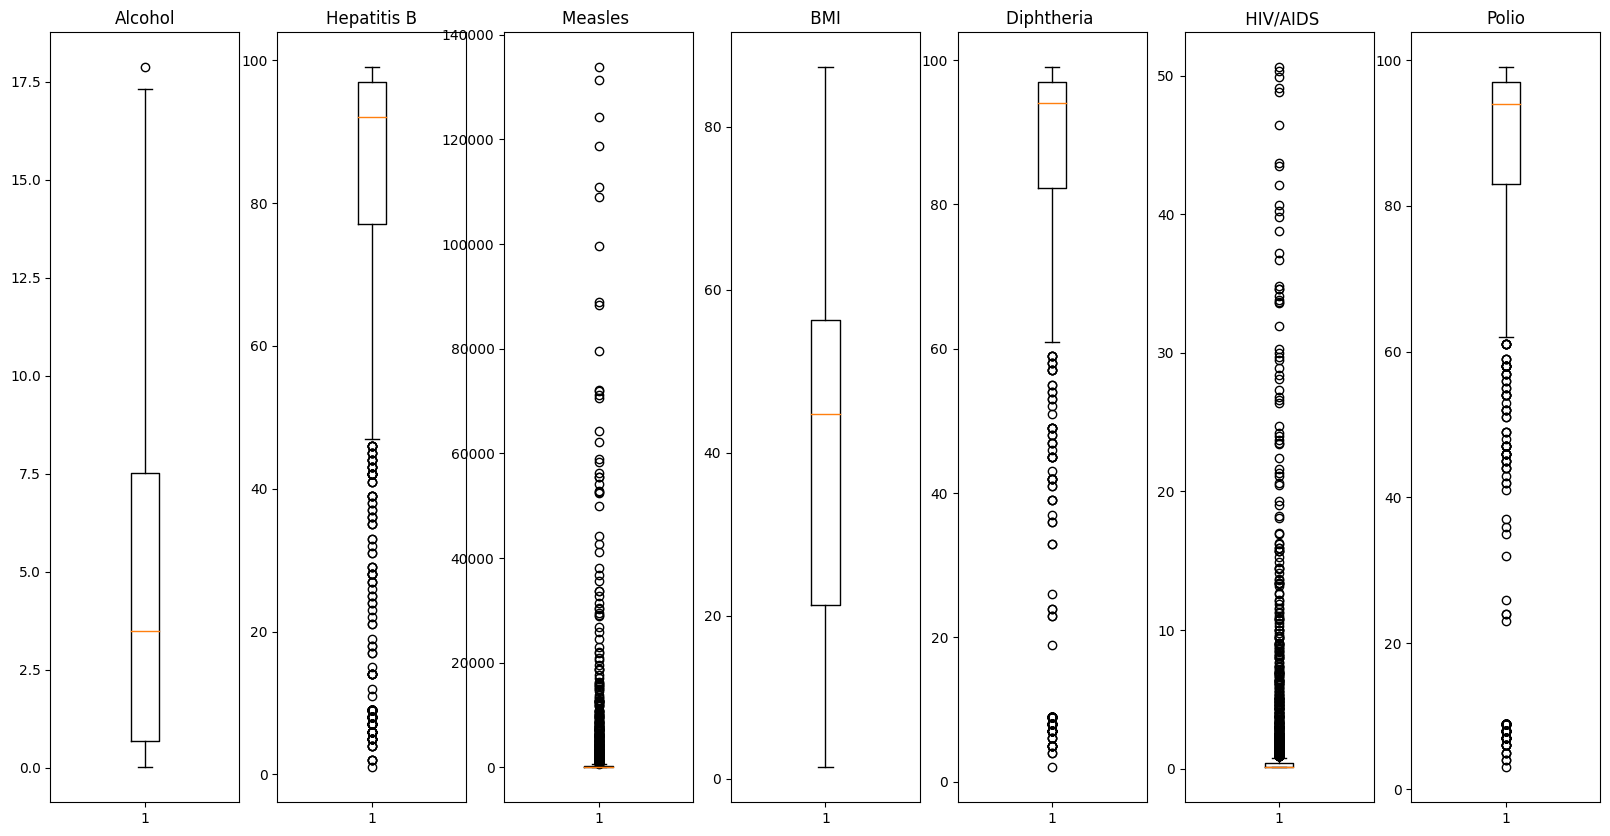

In [38]:

df_mortandad = df[['Alcohol', 'Hepatitis B','Measles ', ' BMI ', 'Diphtheria ',' HIV/AIDS', 'Polio']].copy()
df_mortandad.head(100)
df_mortandad = df_mortandad.dropna()

fig, axs = plt.subplots(1,7,figsize=(20, 10))

keys=df_mortandad.columns.tolist()
len(df_mortandad.columns)

for i in ( range(len(df_mortandad.columns))):
    axs[i].boxplot(df_mortandad[df_mortandad.columns[i]])
    axs[i].set_title(df_mortandad.columns[i])
plt.show()

# Evolucion de la hepatitis B a lo largo de los años en el mundo

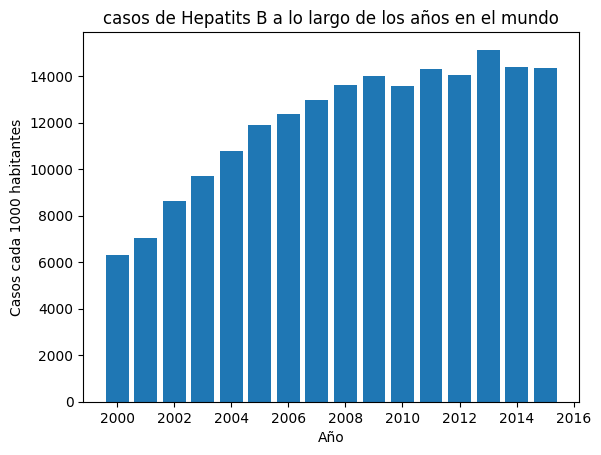

In [39]:
df_hepatitis = df[['Year','Hepatitis B']].copy()

anios = df_hepatitis.groupby(df_hepatitis["Year"])["Hepatitis B"].sum()

plt.bar(anios.index,anios.values)

plt.xlabel('Año')

plt.ylabel('Casos cada 1000 habitantes')

plt.title('casos de Hepatits B a lo largo de los años en el mundo')

plt.show()

## Grafica de Mortalidad adulta para Argentina, Suecia y Tunez , periodo 2000-2015. Valores cada 1000 habitantes

#### barplot


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'mortalidad'),
 Text(0.5, 1.0, 'Mortalidad adulta x anio')]

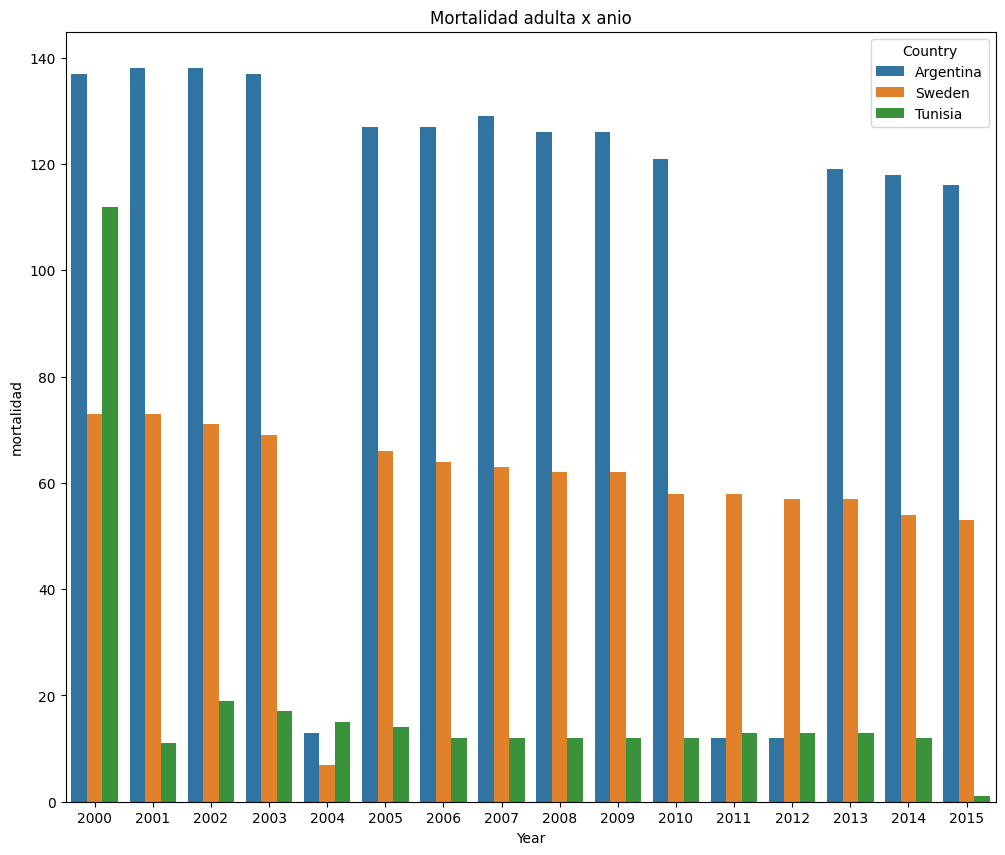

In [40]:
df_mortalidad = df[['Country','Year','Adult Mortality']].copy()

df_mortalidad = df_mortalidad[(df_mortalidad['Country']== 'Argentina') | (df_mortalidad['Country']== 'Sweden') | (df_mortalidad['Country']== 'Tunisia')]

df_mortalidad.head(100)

plt.figure(figsize=(12,10))

ax= sns.barplot(data =df_mortalidad, x='Year',y ='Adult Mortality',  hue= 'Country',fill= True,)

ax.set(xlabel = 'Year', ylabel = 'mortalidad', title = 'Mortalidad adulta x anio')


## Grafica de Porcentaje total de PBI invertido en salud respecto a la cantidad de poblacion de cada pais

#### Scatterplot

[Text(0.5, 0, 'Gasto total en salud %PBI'),
 Text(0, 0.5, 'PBI'),
 Text(0.5, 1.0, 'Gasto total en salud de Argentina, Suecia, y Tunez')]

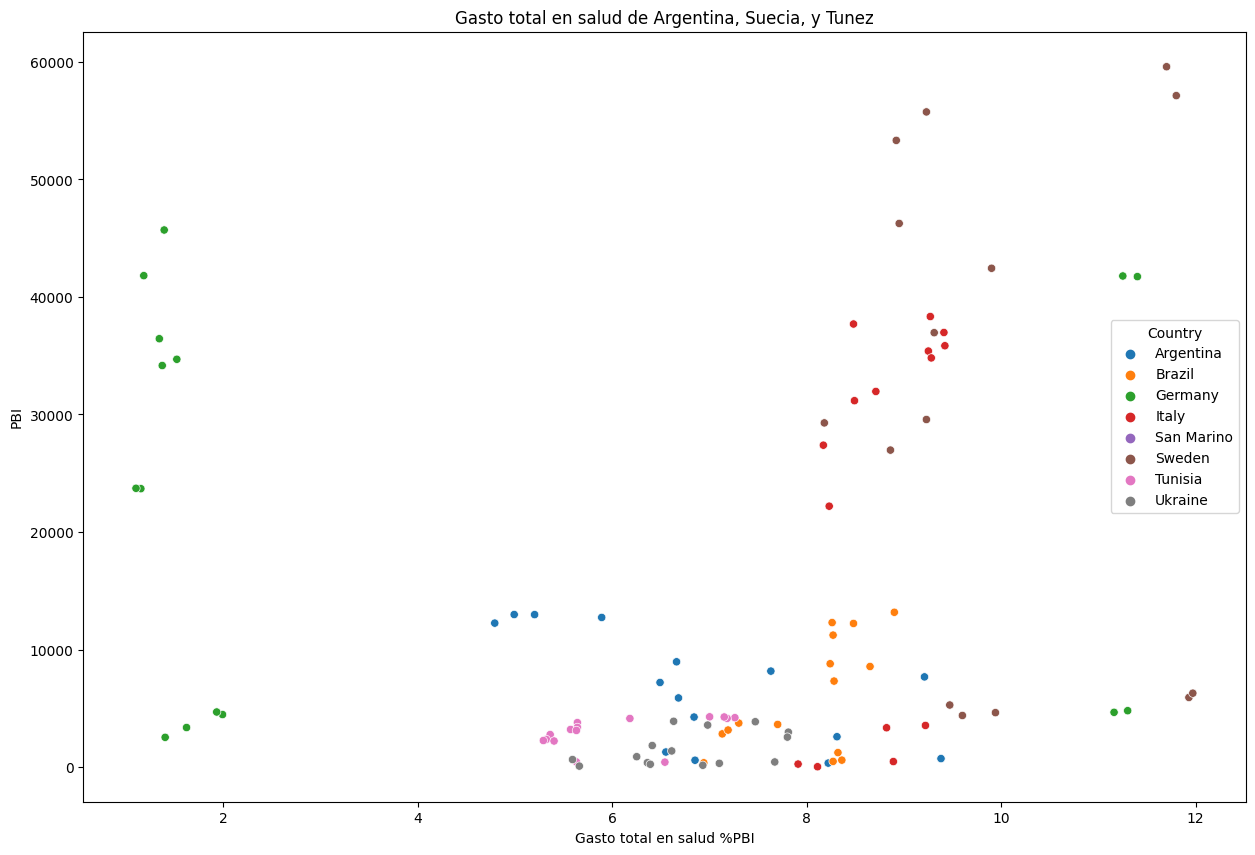

In [41]:
df_mortalidad = df[['Country', 'GDP','Total expenditure']].copy()

df_mortalidad = df_mortalidad[(df_mortalidad['Country']== 'Argentina') | (df_mortalidad['Country']== 'Sweden') | (df_mortalidad['Country']== 'Tunisia')| (df_mortalidad['Country']== 'Italy')| (df_mortalidad['Country']== 'Brazil')
                              | (df_mortalidad['Country']== 'San Marino')| (df_mortalidad['Country']== 'Ukraine')| (df_mortalidad['Country']== 'Germany')]

plt.figure(figsize=(15,10))

ax= sns.scatterplot(data =df_mortalidad, x='Total expenditure', y ='GDP',  hue= 'Country')

ax.set(xlabel = 'Gasto total en salud %PBI', ylabel = 'PBI', title = 'Gasto total en salud de Argentina, Suecia, y Tunez')

# Relacion años de escolaridad vs indice de desarollo humano

### kdeplot

[Text(0.5, 0, 'índice de Desarrollo Humano'),
 Text(0, 0.5, 'densidad de escolarizacion'),
 Text(0.5, 1.0, 'Relación de escolaridad con indice de desarrollo humano')]

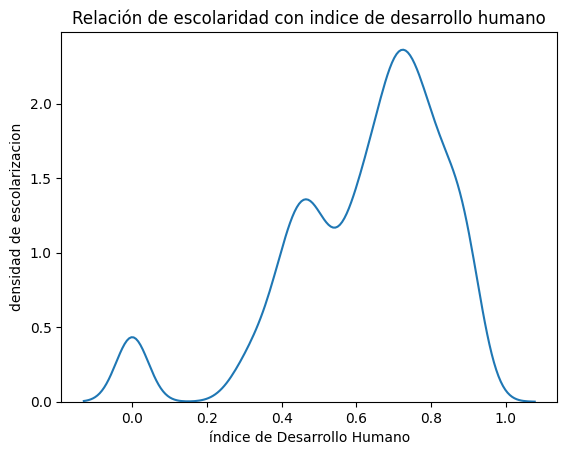

In [42]:
df_mortalidad = df[['Income composition of resources', 'Schooling']].copy()
plt.figure()
ax= sns.kdeplot(data =df_mortalidad['Schooling'], x =df_mortalidad['Income composition of resources'] )
ax.set(xlabel = 'índice de Desarrollo Humano', ylabel = 'densidad de escolarizacion', title = 'Relación de escolaridad con indice de desarrollo humano')

# Respondiendo a las preguntas planteadas, tenemos...

### Ploteamos la relacion entre la espectativa de vida y el estado de desarrollo de los paises

Text(0.5, 1.0, 'Espectativa de vida versus estado de desarrollo')

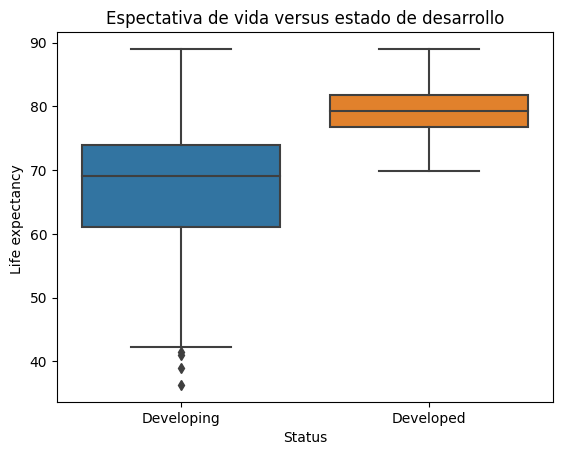

In [5]:
sns.boxplot(x='Status', y= 'Life expectancy ', data= df)
plt.title('Espectativa de vida versus estado de desarrollo')

##### Se puede apreciar que los paises desarrollados poseen una espectativa de vida mas concentrada entre 70 y 90 con una media en 80 mientras que los paises en desarrollo tienen una media de 70 anios pero con una amplia variacion incluso alcanzando valores por debajo de los 40 anios. A simple vista parece ser que esta variable va a tener un importante peso en el modelo pero tal vez no determinante.

#### Procedemos a evaluar la realcion entre el PBI per capita y la espectativa de vida. 

Text(0, 0.5, 'Espectativa de vida')

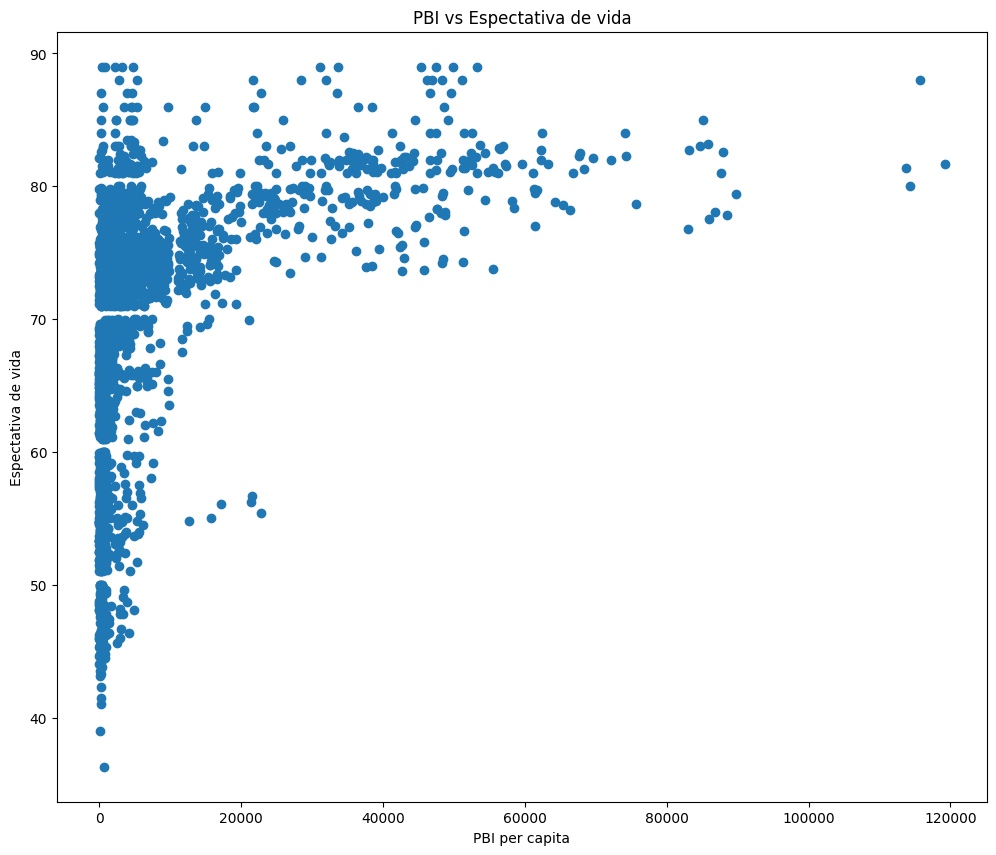

In [9]:
plt.figure(figsize=(12,10))
plt.scatter( df['GDP'],df['Life expectancy '])
plt.title("PBI vs Espectativa de vida");
plt.xlabel('PBI per capita');
plt.ylabel('Espectativa de vida')


##### Se puede observar que el grueso de la distribucion se agrupa en valores de PBI menores a 40000 dolares (incluso podria tomarse 20000 dolares), por lo que se cree que si bien esta variable guarda relacion con la espectativa de vida, no tiene un peso ponderante. No obstante, hasta no demostrarlo no hay nada seguro.

In [10]:
vars = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ',' BMI ', 'under-five deaths ', 'Polio','Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years']
df_agrupado = df.groupby('Country', as_index= False)[vars].mean()

df_agrupado.head(20)

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,0.10000,16.58125,15.58125
1,Albania,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,0.10000,1.61875,1.70000
2,Algeria,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,0.10000,6.09375,5.97500
3,Angola,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.36875,6.19375,6.66875
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.12500,3.42500,3.37500
5,Argentina,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,0.10000,1.07500,0.95000
6,Armenia,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,0.10000,2.03750,2.11250
7,Australia,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,0.10000,0.66875,0.62500
8,Austria,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,0.10000,1.73125,1.93750
9,Azerbaijan,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,0.10000,2.90000,2.94375


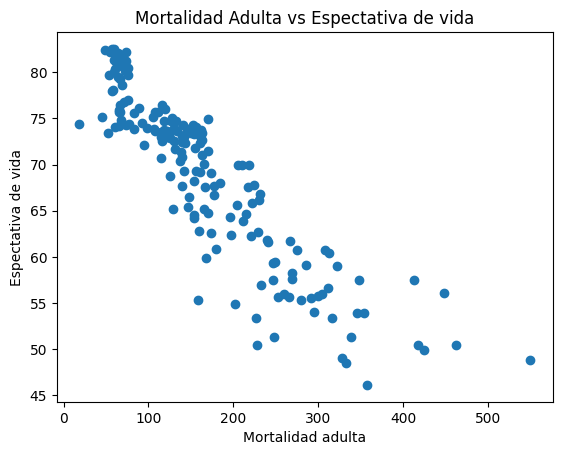

In [12]:
#plt.figure(figsize=(12,10))
plt.scatter(df_agrupado['Adult Mortality'],df_agrupado['Life expectancy '])
plt.title("Mortalidad Adulta vs Espectativa de vida");
plt.xlabel('Mortalidad adulta');
plt.ylabel('Espectativa de vida');

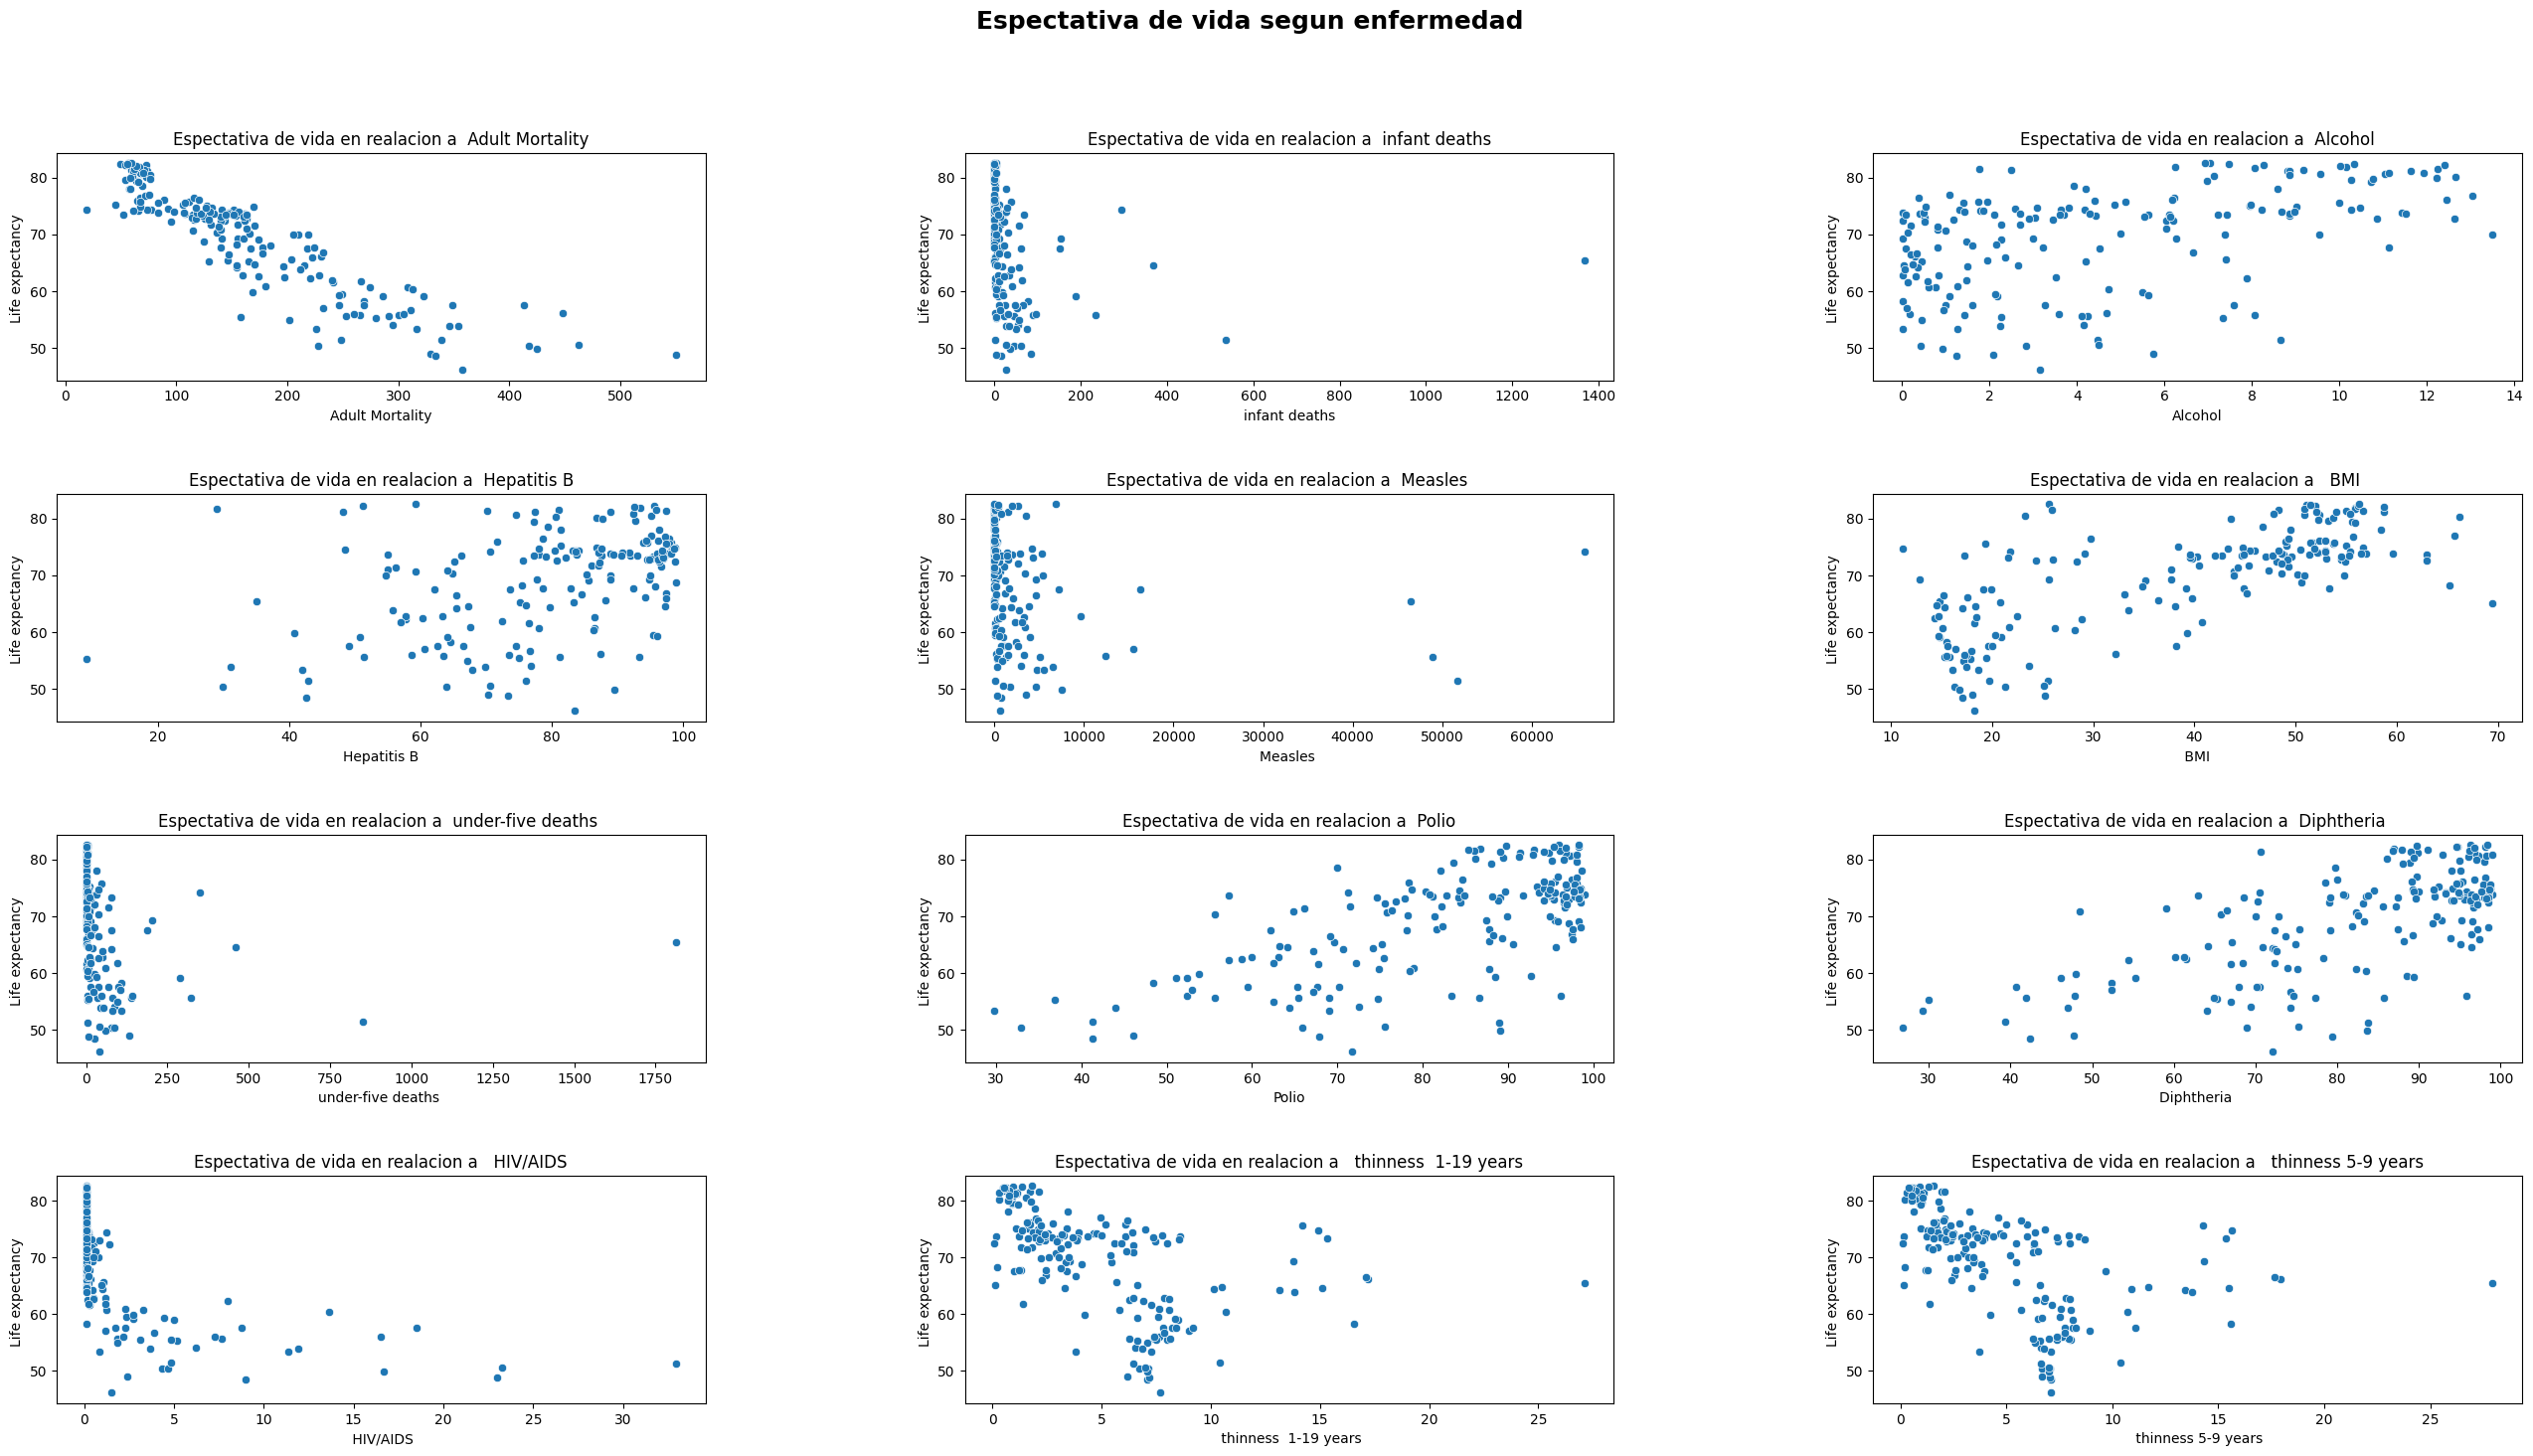

In [43]:
cont = 0
fig = plt.figure(figsize=[32,24])
fig.suptitle('Espectativa de vida segun enfermedad', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
vars2 = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ',' BMI ', 'under-five deaths ', 'Polio','Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years']
for i in vars2:
    cont = cont + 1
    ax = fig.add_subplot(6, 3, cont).set_title(f'Espectativa de vida en realacion a  {vars2[cont-1]}') 
    ax = sns.scatterplot(data = df_agrupado,x= df_agrupado[i], y ='Life expectancy ')
    



#df_agrupado.plot.scatter(x='Life expectancy ', y =df_agrupado[i])


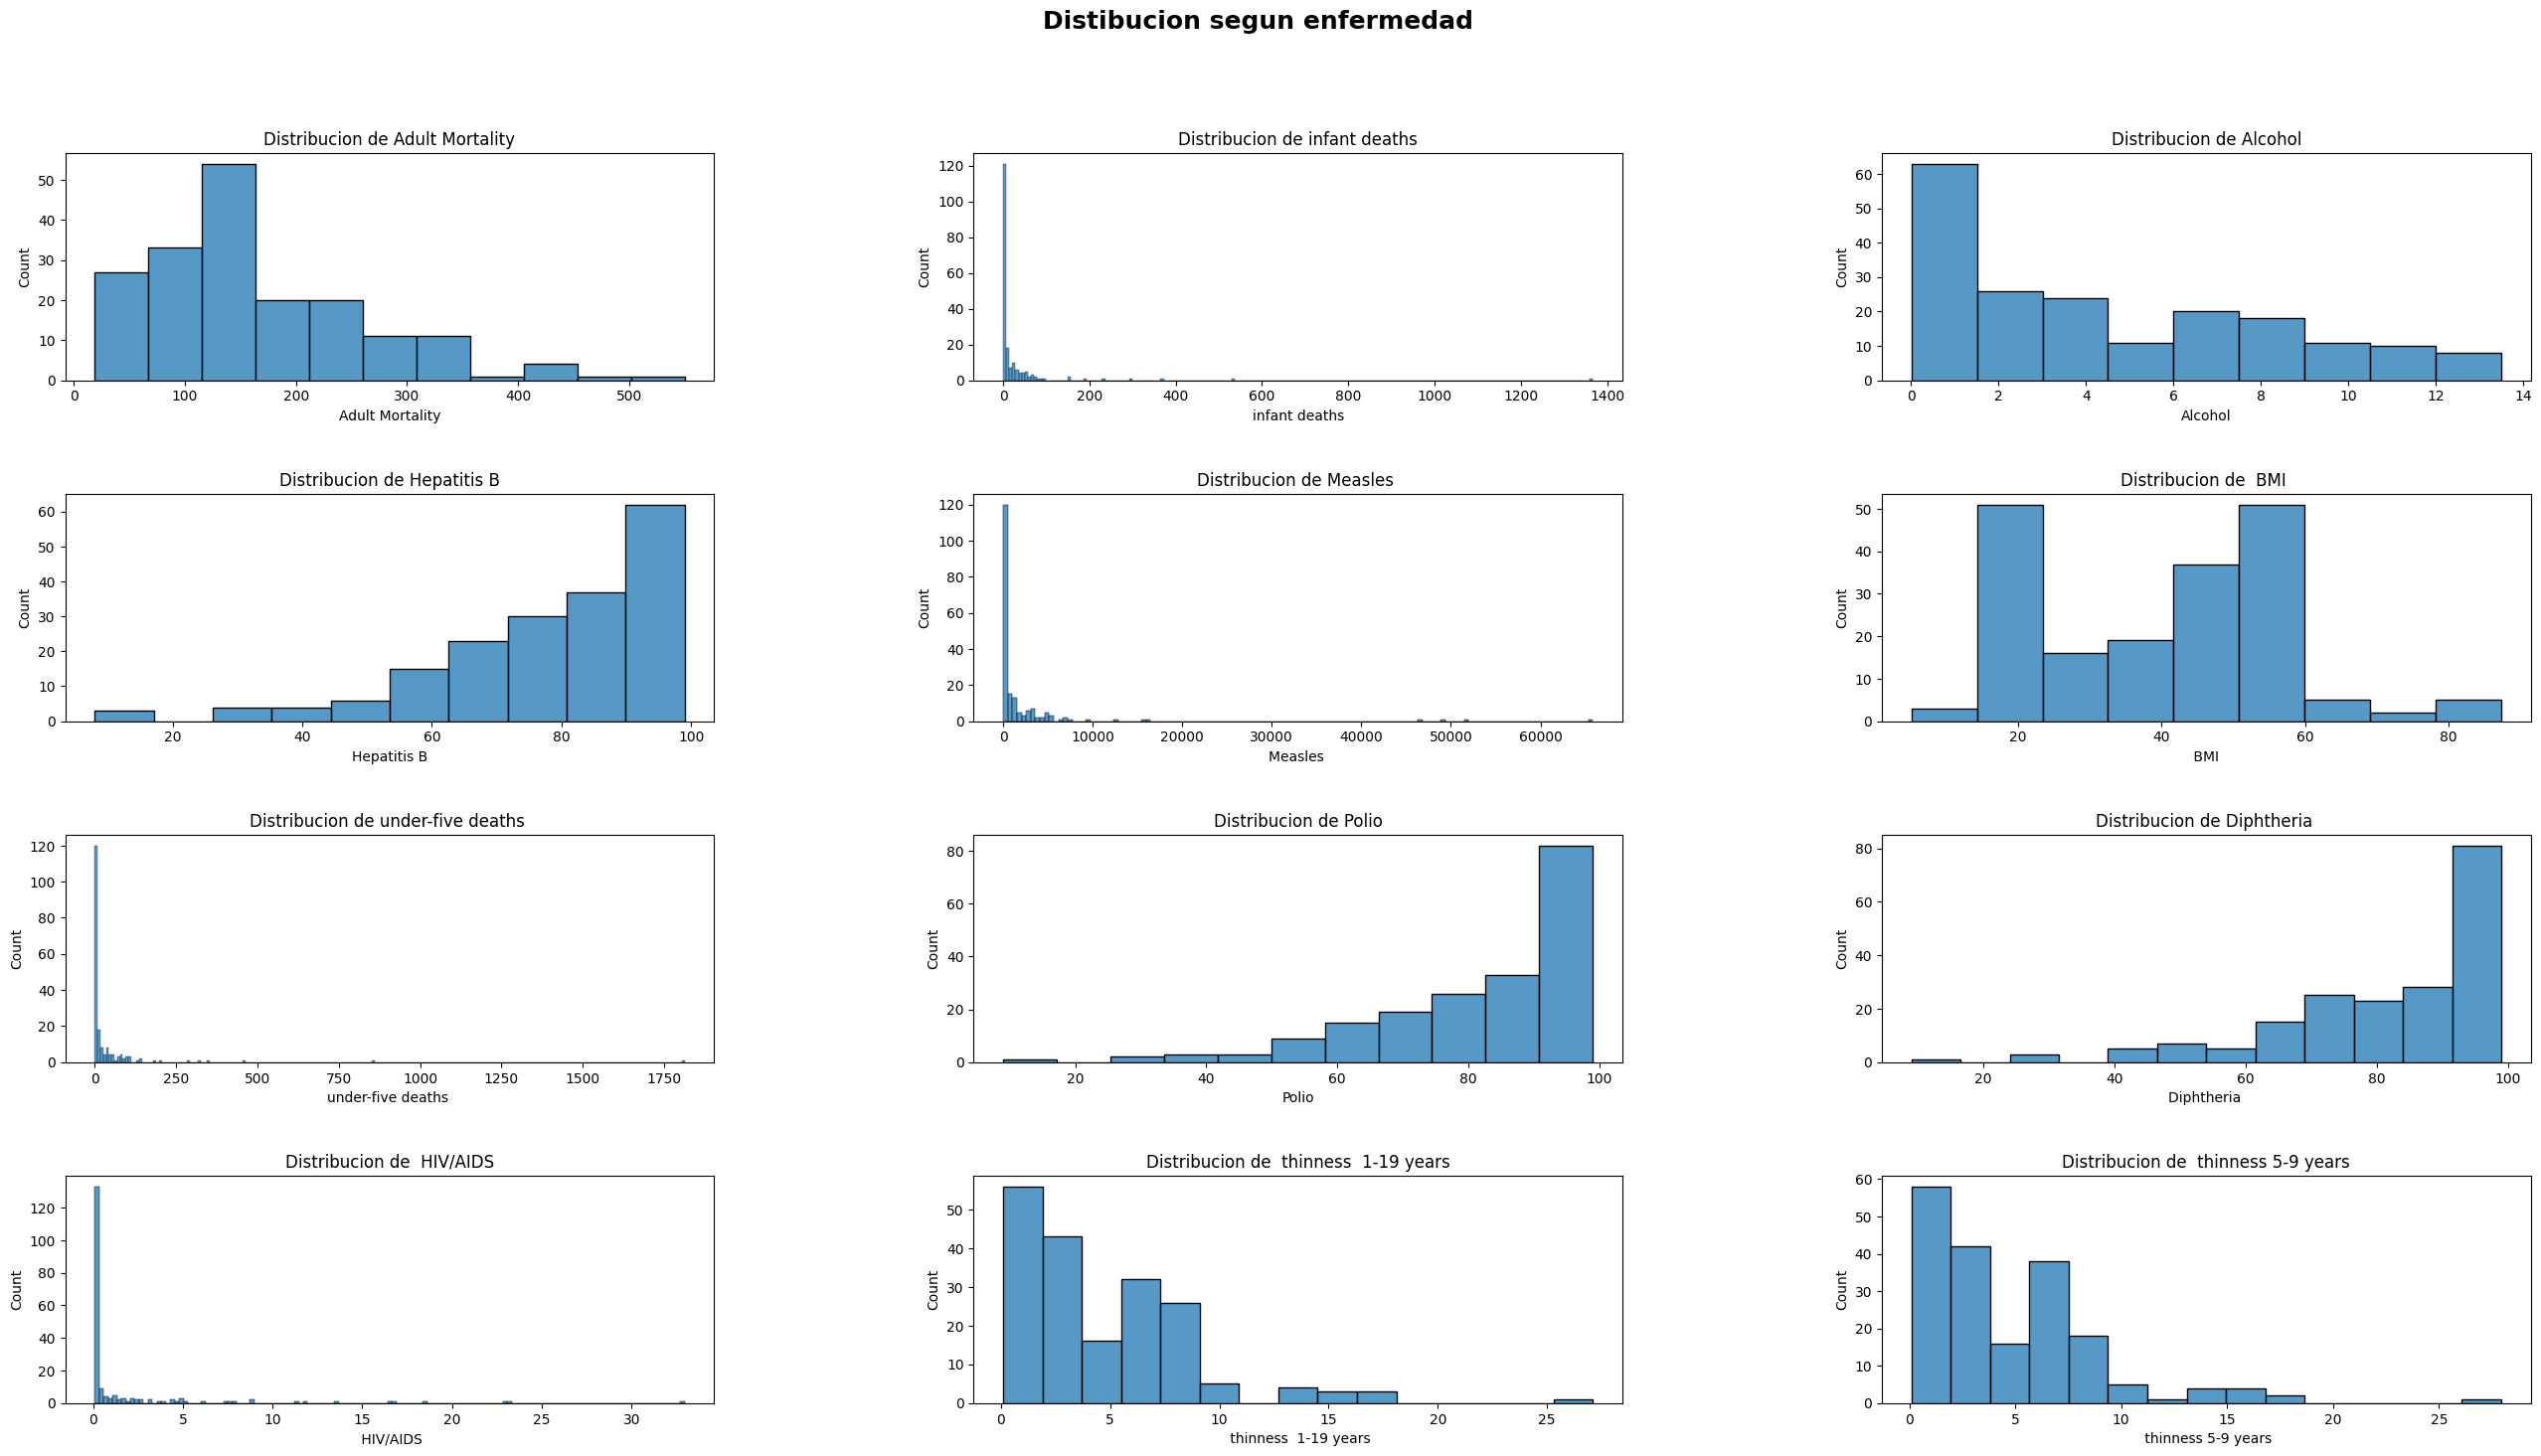

Bad pipe message: %s [b"}\xe8\xfbg\x0c\xd79\xc6\xdbv\xad+_r'\x9a\xf2H\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00", b'#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03']
Bad pipe message: %s [b'\x08\x08\x08\t\x08\n\x08', b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'^\xc7\x0c\xa5\xfe\x05\xda"\xc0\xae}\xec}\x1a\xd5\xcd\x1b,\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W

In [35]:
cont = 0
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distibucion segun enfermedad', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
vars2 = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ',' BMI ', 'under-five deaths ', 'Polio','Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years']
for i in vars2:
    cont = cont + 1
    ax = fig.add_subplot(6, 3, cont).set_title(f'Distribucion de {vars2[cont-1]}') 
    ax = sns.histplot(x= df_agrupado[i])
    